# USED CAR PRICE PREDICTOR



### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_csv("train-data.csv")

In [5]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df_train.shape

(6019, 14)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### Data Pre-processing -

In [8]:
df_train = df_train.iloc[:,1:]
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
df_train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
df_train = df_train[df_train["Mileage"].notna()]

In [11]:
df_train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                  42
New_Price            5194
Price                   0
dtype: int64

In [12]:
df_train = df_train[df_train["Engine"].notna()]
df_train = df_train[df_train["Power"].notna()]
df_train = df_train[df_train["Seats"].notna()]

In [13]:
df_train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5152
Price                   0
dtype: int64

In [14]:
df_train.shape

(5975, 13)

### Feature Engineering -

In [15]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 653.5+ KB


In [17]:
df_train["Mileage"] = df_train["Mileage"].apply(lambda x : float(x.split()[0]))

In [18]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [19]:
# df_train["Power"] = df_train["Power"].apply(lambda x : float(x.split()[0]))
df_train["Engine"] = df_train["Engine"].apply(lambda x : float(x.split()[0]))
df_train["Company"] = df_train["Name"].apply(lambda x : x.split()[0])

In [20]:
df_train=df_train[df_train.Power!="null bhp"]
df_train["Power"] = df_train["Power"].apply(lambda x : float(x.split()[0]))

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5872 non-null   float64
 13  Company            5872 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 688.1+ KB


In [22]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi


### Data Visualization -

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


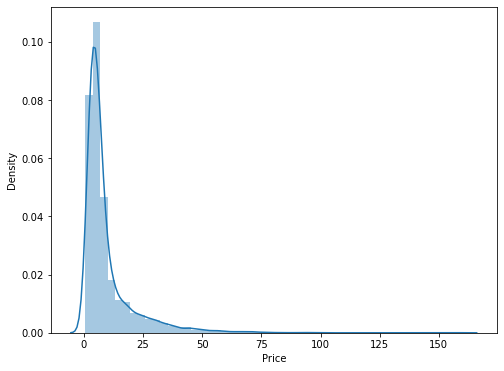

In [23]:
plt.figure(figsize=[8,6])
sns.distplot(df_train.Price)
plt.show()

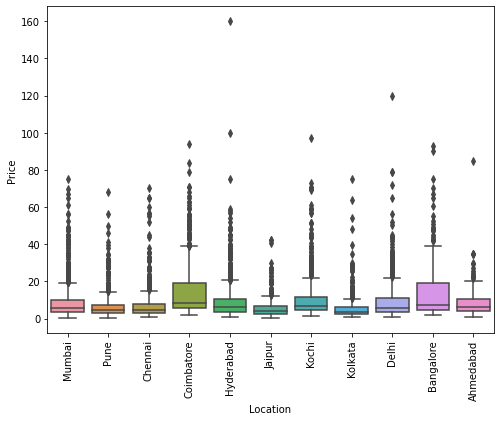

In [24]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df_train, x="Location", y="Price")
plt.xticks(rotation=90)
plt.show()

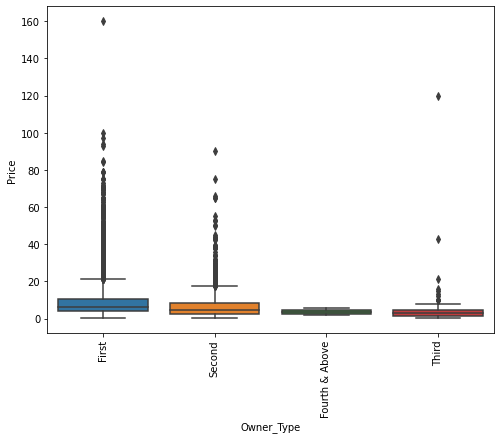

In [25]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df_train, x="Owner_Type", y="Price")
plt.xticks(rotation=90)
plt.show()

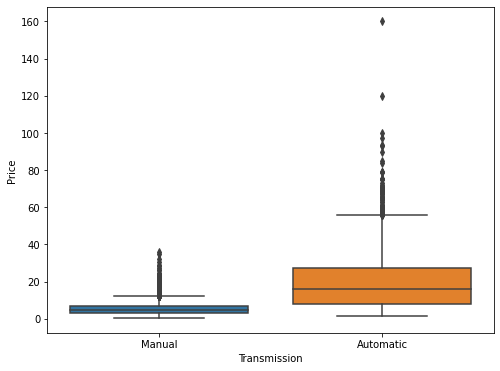

In [26]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df_train, x="Transmission", y="Price")
plt.show()

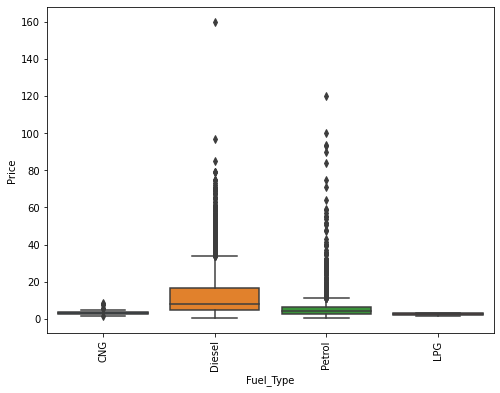

In [27]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df_train, x="Fuel_Type", y="Price")
plt.xticks(rotation=90)
plt.show()

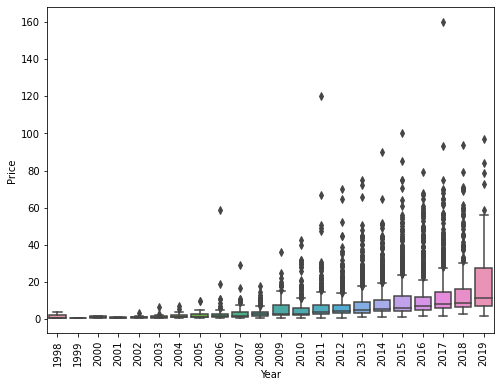

In [28]:
plt.figure(figsize=[8,6])
sns.boxplot(data=df_train, x="Year", y="Price")
plt.xticks(rotation=90)
plt.show()

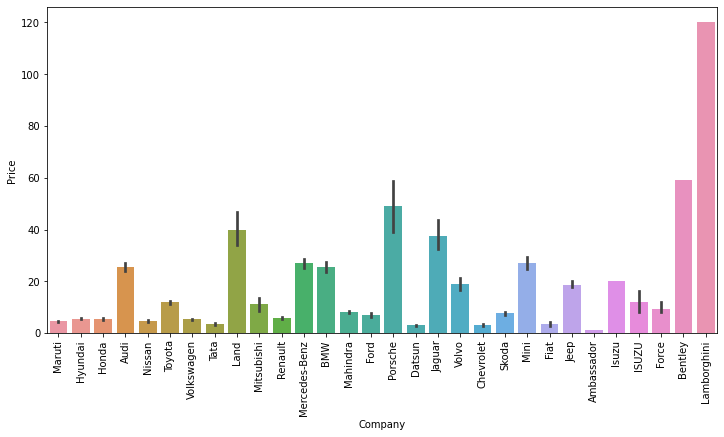

In [42]:
plt.figure(figsize=[12,6])
sns.barplot(data=df_train, x="Company", y="Price")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

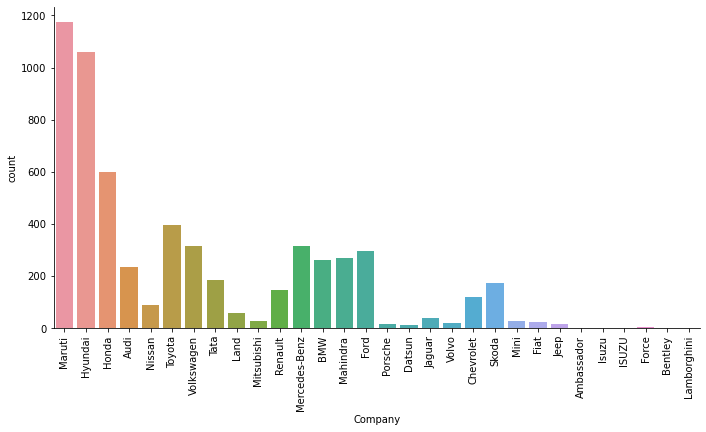

In [30]:
plt.figure(figsize=[20,10])
sns.catplot(data=df_train, x="Company", kind="count", aspect=2)
plt.xticks(rotation=90)
plt.show()

### Working with categorical data -

In [31]:
Fuel_Type=pd.get_dummies(df_train[["Fuel_Type"]], drop_first=True)
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [32]:
Location=pd.get_dummies(df_train[["Location"]], drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [33]:
Transmission=pd.get_dummies(df_train[["Transmission"]], drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [34]:
df_train.Owner_Type.value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [35]:
df_train.replace({"First":1, "Second":2, "Third":3, "Fourth & Above":4}, inplace=True)
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,NaN,17.74,Audi


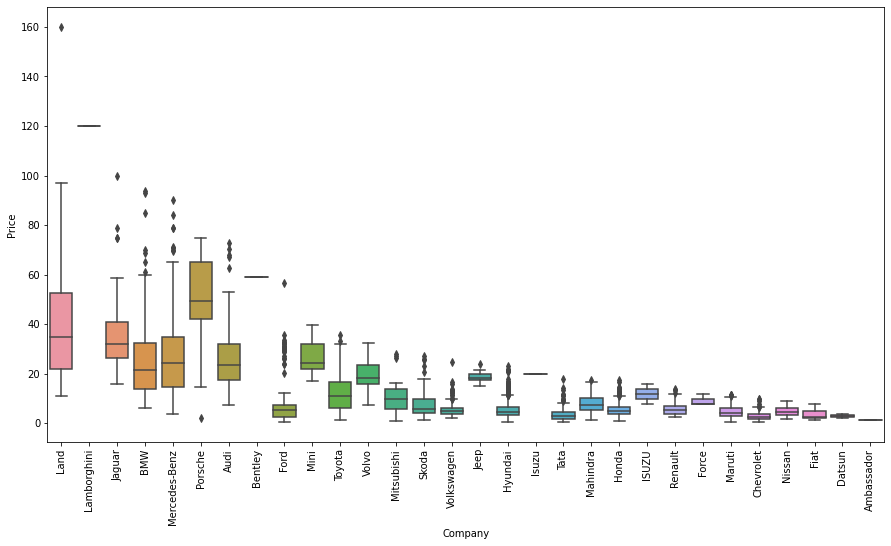

In [36]:
plt.figure(figsize=[15,8])
sns.boxplot(y='Price',x="Company",data = df_train.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()

In [37]:
final_train = pd.concat([df_train,Location,Transmission,Fuel_Type], axis=1)
final_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,...,0,0,0,0,1,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,...,0,0,0,0,0,1,1,1,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,...,0,0,0,0,0,0,1,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,...,0,0,0,0,0,0,1,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,...,0,0,0,0,0,0,0,1,0,0


In [38]:
final_train.drop(["Name","Location","Transmission","Fuel_Type","New_Price","Company"], axis=1, inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,1,0,1,0,0,0
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,0,0,1,1,1,0,0
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,1,1,0,0
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
final_train.shape

(5872, 22)

### Preprocessing Test data -

In [43]:
df_test=pd.read_csv("test-data.csv")
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [44]:
df_test.shape

(1234, 13)

In [45]:
df_test = df_test.iloc[:,1:]
df_test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [48]:
df_test = df_test[df_test["Engine"].notna()]
df_test = df_test[df_test["Power"].notna()]
df_test = df_test[df_test["Seats"].notna()]
df_test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1041
dtype: int64

In [49]:
df_test["Mileage"] = df_test["Mileage"].apply(lambda x : float(x.split()[0]))
df_test["Engine"] = df_test["Engine"].apply(lambda x : float(x.split()[0]))
df_test=df_test[df_test.Power!="null bhp"]
df_test["Power"] = df_test["Power"].apply(lambda x : float(x.split()[0]))
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,NaN


In [50]:
Fuel_Type=pd.get_dummies(df_test[["Fuel_Type"]], drop_first=True)
Location=pd.get_dummies(df_test[["Location"]], drop_first=True)
Transmission=pd.get_dummies(df_test[["Transmission"]], drop_first=True)
df_test.replace({"First":1, "Second":2, "Third":3, "Fourth & Above":4}, inplace=True)
final_test = pd.concat([df_test,Location,Transmission,Fuel_Type], axis=1)
final_test.drop(["Name","Location","Transmission","Fuel_Type","New_Price"], axis=1, inplace=True)
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2014,40929,1,32.26,998.0,58.20,4.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,2,24.70,796.0,47.30,5.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2017,34000,1,13.68,2393.0,147.80,7.0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,2014,29000,1,18.50,1197.0,82.85,5.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5,2016,85609,2,16.00,2179.0,140.00,7.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [52]:
final_test.shape

(1201, 21)

In [53]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')

### Final features selection -

In [55]:
X=final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol']]
y=final_train.loc[:,['Price']]

In [56]:
X.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,1,26.60,998.0,58.16,5.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,2015,41000,1,19.67,1582.0,126.20,5.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,2011,46000,1,18.20,1199.0,88.70,5.0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,2013,40670,2,15.20,1968.0,140.80,5.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [57]:
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


### Training the model

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Linear Regression -

In [73]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("Accuracy on training set is ", model1.score(X_train,y_train))
print("Accuracy on testing set is ", model1.score(X_test,y_test))

Accuracy on training set is  0.7005713010620835
Accuracy on testing set is  0.7318039008582005


In [70]:
from sklearn import metrics
print("\t\t Error Table -")
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R squared Error - ", metrics.r2_score(y_test, y_pred1))

		 Error Table -
Mean Absolute Error -  3.63121220787446
Mean Squared Error -  33.203890893604765
Root Mean Squared Error -  5.762281743684941
R squared Error -  0.7318039008582005


#### Decision Tree Regressor -

In [74]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("Accuracy on training set is ", model2.score(X_train,y_train))
print("Accuracy on testing set is ", model2.score(X_test,y_test))

Accuracy on training set is  0.9999977258940359
Accuracy on testing set is  0.798020299754449


In [71]:
from sklearn import metrics
print("\t\t Error Table -")
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred2))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R squared Error - ", metrics.r2_score(y_test, y_pred2))

		 Error Table -
Mean Absolute Error -  2.030678014184397
Mean Squared Error -  24.67080593853428
Root Mean Squared Error -  4.966971505709921
R squared Error -  0.8007277539671224


#### Random Forest Regressor -

In [75]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("Accuracy on training set is ", model3.score(X_train,y_train))
print("Accuracy on testing set is ", model3.score(X_test,y_test))

<ipython-input-75-2f9e177783dd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)


Accuracy on training set is  0.9819592475546666
Accuracy on testing set is  0.9290509316790824


In [72]:
from sklearn import metrics
print("\t\t Error Table -")
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred3))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred3))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("R squared Error - ", metrics.r2_score(y_test, y_pred3))

		 Error Table -
Mean Absolute Error -  1.434386921985816
Mean Squared Error -  8.926477044554964
Root Mean Squared Error -  2.9877210453044247
R squared Error -  0.9278986209748821


#### Support Vector Regressor -

In [76]:
from sklearn.svm import SVR
model4 = SVR()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print("Accuracy on training set is ", model4.score(X_train,y_train))
print("Accuracy on testing set is ", model4.score(X_test,y_test))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on training set is  -0.0750609097214825
Accuracy on testing set is  -0.0923310251435574


In [77]:
from sklearn.linear_model import Lasso
model5 = Lasso()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

print("Accuracy on training set is ", model5.score(X_train,y_train))
print("Accuracy on testing set is ", model5.score(X_test,y_test))

Accuracy on training set is  0.675068376098846
Accuracy on testing set is  0.7000146360446963


In [78]:
final_pred = model3.predict(final_test)
final_pred

array([ 3.3189,  3.2313, 17.9097, ...,  2.7634,  4.3312, 17.7471])